In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Tharun\Downloads\mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [5]:
df.shape

(1453, 15)

In [6]:
MD_x = (df == "Yes").astype(int)
column_means = MD_x.mean().round(2)
print(column_means)

yummy             0.55
convenient        0.91
spicy             0.09
fattening         0.87
greasy            0.53
fast              0.90
cheap             0.60
tasty             0.64
expensive         0.36
healthy           0.20
disgusting        0.24
Like              0.00
Age               0.00
VisitFrequency    0.00
Gender            0.00
dtype: float64


In [7]:
from sklearn.decomposition import PCA

binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df_binary = df[binary_columns]

df_binary = df_binary.applymap(lambda x: 1 if x == 'Yes' else 0)

In [8]:
pca = PCA()
pca_result = pca.fit_transform(df_binary)

print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative explained variance:', pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative explained variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [9]:

# Print factor loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=binary_columns)
print('Factor loadings:')
print(loadings)


Factor loadings:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041 

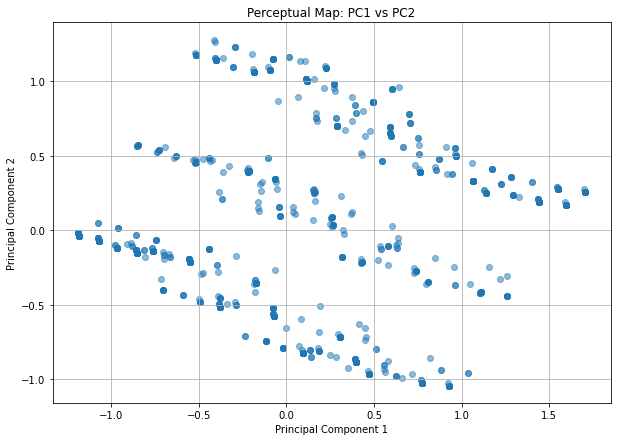

In [10]:
#Perceptual map (e.g., PC1 vs PC2)
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Perceptual Map: PC1 vs PC2')
plt.grid(True)
plt.show()

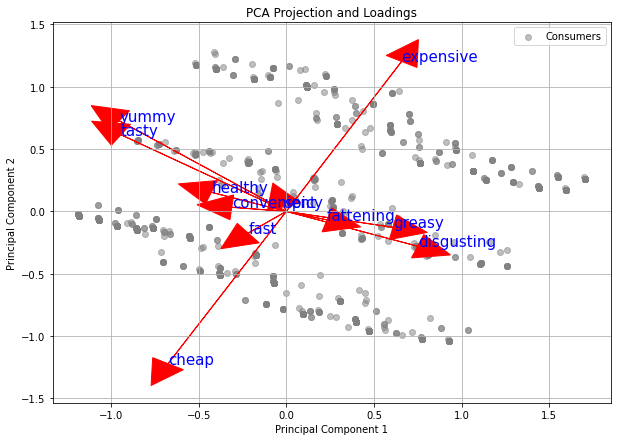

In [11]:
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(pca_result[0]))])
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], color='grey', alpha=0.5, label='Consumers')

# Plot the factor loadings as arrows
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=binary_columns)
scaling_factor = 2  

# Add arrows for the loadings
for i in range(len(loadings)):
    plt.arrow(0, 0, loadings.iloc[i, 0] * scaling_factor, loadings.iloc[i, 1] * scaling_factor, 
              head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.text(loadings.iloc[i, 0] * scaling_factor, loadings.iloc[i, 1] * scaling_factor, binary_columns[i], color='blue', fontsize=15)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection and Loadings')
plt.grid(True)
plt.legend()
plt.show()

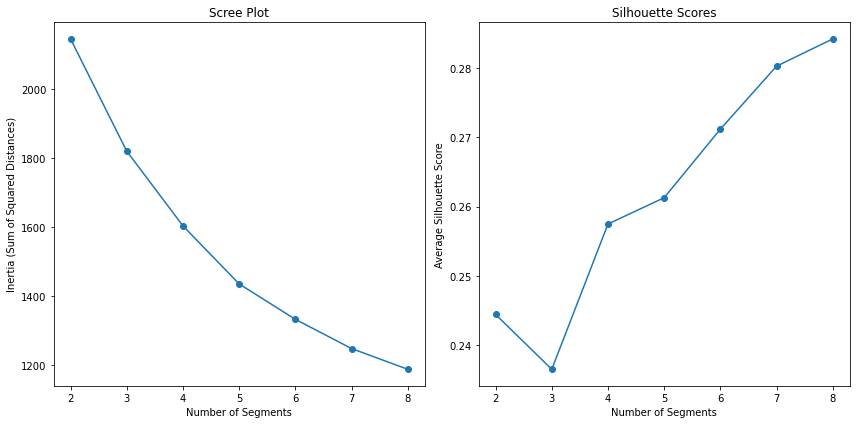

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Range of number of segments
segment_range = range(2, 9)

inertia = []
silhouette_avg = []

# Perform k-means clustering for each number of segments
for n_clusters in segment_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(df_binary)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(df_binary, kmeans.labels_))

# Plot the scree plot (inertia vs. number of segments)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(segment_range, inertia, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Scree Plot')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(segment_range, silhouette_avg, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()


In [13]:
# Stability Analysis
# Initialize a dictionary to store labels for stability check
stability_dict = {n: [] for n in segment_range}

for n_clusters in segment_range:
    for _ in range(10):  # Perform multiple runs for stability
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=np.random.randint(0, 1000))
        labels = kmeans.fit_predict(df_binary)
        stability_dict[n_clusters].append(labels)

# Example: Print stability for a specific number of clusters
import scipy.stats as stats

n_clusters = 3  
label_sets = stability_dict[n_clusters]
stability_scores = []

for i in range(len(label_sets)):
    for j in range(i + 1, len(label_sets)):
        # Calculate Jaccard index or any other similarity measure for stability
        overlap = np.sum(label_sets[i] == label_sets[j]) / len(label_sets[i])
        stability_scores.append(overlap)

# Print average stability score
print(f'Average stability score for {n_clusters} clusters:', np.mean(stability_scores))


Average stability score for 3 clusters: 0.3706660549055593


In [14]:
import scipy.stats as stats

n_clusters = 4  
label_sets = stability_dict[n_clusters]
stability_scores = []

for i in range(len(label_sets)):
    for j in range(i + 1, len(label_sets)):
        # Calculate Jaccard index or any other similarity measure for stability
        overlap = np.sum(label_sets[i] == label_sets[j]) / len(label_sets[i])
        stability_scores.append(overlap)

# Print average stability score
print(f'Average stability score for {n_clusters} clusters:', np.mean(stability_scores))


Average stability score for 4 clusters: 0.30618643419744584


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

n_bootstrap = 100
n_restarts = 10
segment_range = range(2, 9)

# Initialize dictionary to store ARI values
global_stability = {n_clusters: [] for n_clusters in segment_range}

# Perform global stability analysis
for n_clusters in segment_range:
    for _ in range(n_bootstrap):
        df_bootstrap = resample(df_binary, random_state=np.random.randint(0, 1000))
        
        # List to store cluster labels for this bootstrap sample
        bootstrap_labels = []
        
        for _ in range(n_restarts):
            kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=np.random.randint(0, 1000))
            labels = kmeans.fit_predict(df_bootstrap)
            bootstrap_labels.append(labels)
        
        # Compare cluster solutions within bootstrap sample
        for i in range(len(bootstrap_labels)):
            for j in range(i + 1, len(bootstrap_labels)):
                ari = adjusted_rand_score(bootstrap_labels[i], bootstrap_labels[j])
                global_stability[n_clusters].append(ari)

# Convert results to DataFrame for plotting
stability_df = pd.DataFrame(global_stability)

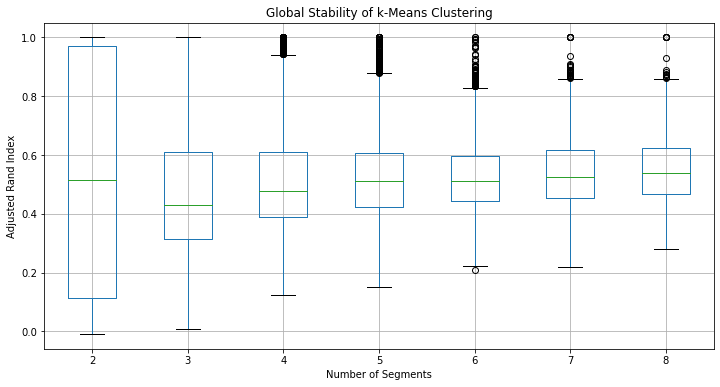

In [16]:
# Plot boxplots of stability
plt.figure(figsize=(12, 6))
stability_df.boxplot()
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of k-Means Clustering')
plt.grid(True)
plt.show()

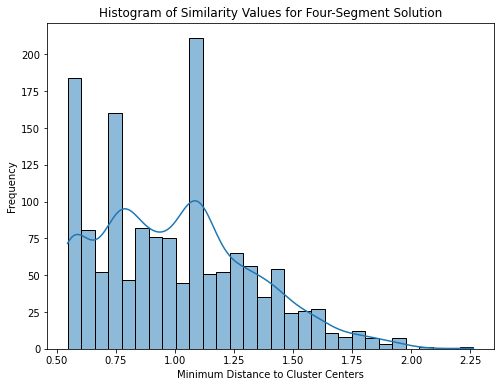

In [17]:
# Example of computing similarity values (distances between cluster centers) for the four-segment solution

# Fit k-means for 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4_labels = kmeans_4.fit_predict(df_binary)

# Compute pairwise distances between cluster centers
distances = kmeans_4.transform(df_binary)
min_distances = np.min(distances, axis=1)

# Plot histogram of similarity values (distances)
plt.figure(figsize=(8, 6))
sns.histplot(min_distances, bins=30, kde=True)
plt.xlabel('Minimum Distance to Cluster Centers')
plt.ylabel('Frequency')
plt.title('Histogram of Similarity Values for Four-Segment Solution')
plt.show()


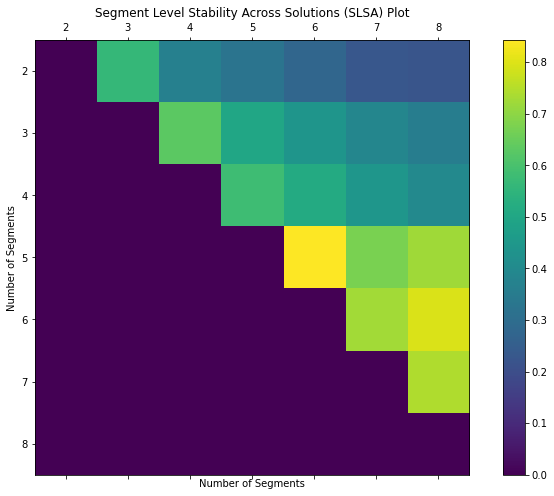

In [18]:
from sklearn.metrics import adjusted_rand_score
import itertools

# Perform k-means clustering for different number of clusters
clustering_solutions = {}
for n_clusters in segment_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    clustering_solutions[n_clusters] = kmeans.fit_predict(df_binary)

# Calculate segment level stability
stability_matrix = np.zeros((len(segment_range), len(segment_range)))

for i, n1 in enumerate(segment_range):
    for j, n2 in enumerate(segment_range):
        if i < j:
            # Compare segment memberships between different numbers of segments
            solution1 = clustering_solutions[n1]
            solution2 = clustering_solutions[n2]
            ari = adjusted_rand_score(solution1, solution2)
            stability_matrix[i, j] = ari

# Create SLSA plot
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(stability_matrix, cmap='viridis')
plt.colorbar(cax)
plt.xticks(ticks=np.arange(len(segment_range)), labels=segment_range)
plt.yticks(ticks=np.arange(len(segment_range)), labels=segment_range)
plt.xlabel('Number of Segments')
plt.ylabel('Number of Segments')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.show()


In [19]:


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Example data preparation
# Assuming df_binary is your DataFrame and already has a 'Segment' column
# Fit k-means for 4 clusters (example data)
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
labels_4 = kmeans_4.fit_predict(df_binary)

df_binary['Segment'] = labels_4



In [20]:
def calculate_segment_stability(df, original_labels, n_clusters, n_bootstrap=100):
    stability_scores = {i: [] for i in range(n_clusters)}
    
    for _ in range(n_bootstrap):
        # Bootstrap sampling
        df_bootstrap = resample(df, random_state=np.random.randint(0, 1000))
        kmeans_bootstrap = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        labels_bootstrap = kmeans_bootstrap.fit_predict(df_bootstrap)
        
        for segment in range(n_clusters):
            # Create boolean arrays for segment membership
            original_segment_labels = (original_labels == segment)
            bootstrap_segment_labels = (labels_bootstrap[df_bootstrap.index] == segment)
            
            # Calculate stability for each segment
            ari = adjusted_rand_score(original_segment_labels, bootstrap_segment_labels)
            stability_scores[segment].append(ari)
    
    # Calculate mean stability scores
    mean_stability = {segment: np.mean(stability_scores[segment]) for segment in range(n_clusters)}
    return mean_stability

# Calculate stability for 4 segments
segment_stability = calculate_segment_stability(df_binary, labels_4, 4)


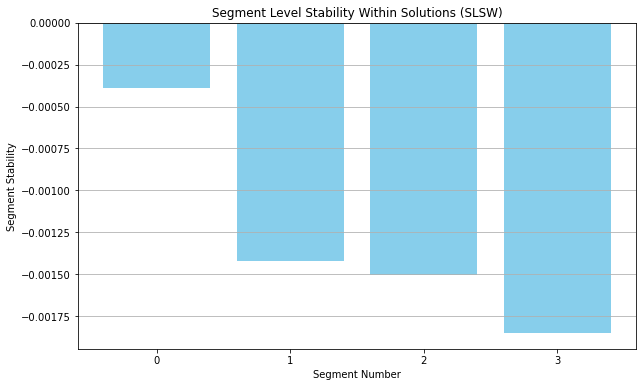

In [21]:
# Convert stability results to DataFrame for plotting
stability_df = pd.DataFrame(list(segment_stability.items()), columns=['Segment', 'Stability'])

# Plot segment stability
plt.figure(figsize=(10, 6))
plt.bar(stability_df['Segment'], stability_df['Stability'], color='skyblue')

plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability Within Solutions (SLSW)')
plt.xticks(stability_df['Segment'])
plt.grid(axis='y')
plt.show()


In [22]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model (GMM) for binary data
def fit_gmm(df, n_components_range):
    results = []
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
        gmm.fit(df)
        # Compute AIC and BIC manually
        aic_score = gmm.aic(df)
        bic_score = gmm.bic(df)
        results.append((n_components, aic_score, bic_score))
    return results

# Example data preparation
# Assuming df_binary is your DataFrame with binary features
n_components_range = range(2, 9)
results = fit_gmm(df_binary, n_components_range)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Number of Segments', 'AIC', 'BIC'])


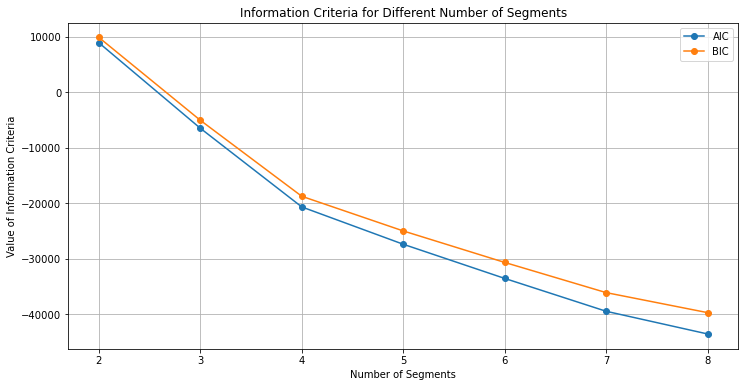

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(results_df['Number of Segments'], results_df['AIC'], marker='o', label='AIC')
plt.plot(results_df['Number of Segments'], results_df['BIC'], marker='o', label='BIC')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Different Number of Segments')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming df_binary is your DataFrame with binary features

# Fit K-means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(df_binary)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_labels = gmm.fit_predict(df_binary)  # Make sure to fit the model before predicting

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'KMeans': kmeans_labels,
    'GMM': gmm_labels
})

# Cross-tabulation
cross_tab = pd.crosstab(comparison_df['KMeans'], comparison_df['GMM'])
print(cross_tab)


GMM       0    1    2    3
KMeans                    
0       368    5    0    0
1         0  315    0    0
2         0    1  340  185
3         0  239    0    0


In [25]:
from sklearn.mixture import GaussianMixture

# Fit GMM with k-means initialization
gmm_with_kmeans = GaussianMixture(n_components=4, n_init=1, init_params='kmeans', random_state=1234)
gmm_labels_with_kmeans = gmm_with_kmeans.fit_predict(df_binary)

# Create DataFrame for comparison
comparison_df_kmeans_init = pd.DataFrame({
    'KMeans': kmeans_labels,
    'GMM_KMeans_Init': gmm_labels_with_kmeans
})

# Cross-tabulate the results
cross_tab_kmeans_init = pd.crosstab(comparison_df_kmeans_init['KMeans'], comparison_df_kmeans_init['GMM_KMeans_Init'])
print(cross_tab_kmeans_init)


GMM_KMeans_Init    0    1    2    3
KMeans                             
0                  0   48  270   55
1                315    0    0    0
2                  0  340    1  185
3                  0    0  239    0


In [26]:
# Fit GMM with random initialization
gmm_random = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_random.fit(df_binary)
log_likelihood_random = gmm_random.score(df_binary) * df_binary.shape[0]  # log likelihood

# Fit GMM with k-means initialization
gmm_kmeans = GaussianMixture(n_components=4, n_init=1, init_params='kmeans', random_state=1234)
gmm_kmeans.fit(df_binary)
log_likelihood_kmeans = gmm_kmeans.score(df_binary) * df_binary.shape[0]  # log likelihood

print(f'Log-Likelihood (Random Init): {log_likelihood_random}')
print(f'Log-Likelihood (K-Means Init): {log_likelihood_kmeans}')


Log-Likelihood (Random Init): 10699.877628789207
Log-Likelihood (K-Means Init): 6339.236944360062


In [27]:
# For random initialization
log_likelihood_random = gmm_random.score(df_binary) * df_binary.shape[0]  

# For k-means initialization
log_likelihood_kmeans = gmm_kmeans.score(df_binary) * df_binary.shape[0]  
print(f'Converged (Random Init): {gmm_random.converged_}')
print(f'Converged (K-Means Init): {gmm_kmeans.converged_}')


Converged (Random Init): True
Converged (K-Means Init): True


In [28]:
print("GMM with Random Initialization:")
print(f"Means: {gmm_random.means_}")
print(f"Covariances: {gmm_random.covariances_}")

print("GMM with K-Means Initialization:")
print(f"Means: {gmm_kmeans.means_}")
print(f"Covariances: {gmm_kmeans.covariances_}")


GMM with Random Initialization:
Means: [[0.01902174 0.91032609 0.08695652 0.91304348 0.58967391 0.95380435
  0.89130435 0.30163043 0.         0.07608696 0.32608696 1.        ]
 [0.50357143 0.8375     0.10892857 0.91071429 0.64821429 0.80892857
  0.1        0.55892857 0.91071429 0.14464286 0.37142857 2.55      ]
 [0.96764706 0.97647059 0.08529412 0.69117647 0.         0.95882353
  0.88529412 0.96176471 0.02941176 0.43235294 0.01470588 0.        ]
 [1.         0.98918919 0.07567568 0.96756757 1.         0.96216216
  1.         1.         0.         0.17837838 0.10810811 0.        ]]
Covariances: [[[ 1.86609122e-02 -1.01163723e-03  1.06332673e-03  1.65406424e-03
    7.80511564e-03  8.78721627e-04  2.06758030e-03 -5.73753534e-03
    0.00000000e+00 -1.44730621e-03 -3.48534993e-03  0.00000000e+00]
  [-1.01163723e-03  8.16335021e-02 -3.07183334e-03  3.07183368e-03
   -1.50564153e-02  9.44441161e-03 -9.74716443e-03  1.61788161e-02
    0.00000000e+00 -1.32915879e-03 -3.32585064e-02  0.00000000e

In [30]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load your dataset
# mcdonalds = pd.read_csv('path_to_your_data.csv')

# Example: create a DataFrame (replace this with your actual data loading)
np.random.seed(1234)
data = np.random.randn(1450, 11)  # Dummy data
columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
mcdonalds = pd.DataFrame(data, columns=columns)
mcdonalds['Like'] = np.random.randint(-5, 6, size=len(mcdonalds))

# Transform Like ratings
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Prepare features and target
X = mcdonalds[columns]
y = mcdonalds['Like.n']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm_labels = gmm.fit_predict(X_scaled)

# Add GMM labels to DataFrame
mcdonalds['Cluster'] = gmm_labels

# Fit Linear Regression for each cluster
regression_models = {}
for cluster in range(2):
    cluster_data = mcdonalds[mcdonalds['Cluster'] == cluster]
    X_cluster = cluster_data[columns]
    y_cluster = cluster_data['Like.n']
    
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)
    
    regression_models[cluster] = model
    print(f"Cluster {cluster} coefficients: {model.coef_}")
    print(f"Cluster {cluster} intercept: {model.intercept_}")

# Results
print("GMM Labels:")
print(mcdonalds['Cluster'].value_counts())


Cluster 0 coefficients: [-0.24040696 -0.10107091  0.04353055  0.05100004  0.14501088 -0.03880956
 -0.16069141  0.00350422 -0.12397648  0.09252968 -0.12938337]
Cluster 0 intercept: 5.998894523205335
Cluster 1 coefficients: [ 0.15116729 -0.10811386  0.06716425  0.0892091   0.12120581 -0.04706857
  0.09465875 -0.02675332 -0.04016514 -0.1299988   0.25633643]
Cluster 1 intercept: 5.8007060932165775
GMM Labels:
0    760
1    690
Name: Cluster, dtype: int64


In [41]:
from sklearn.cluster import KMeans

# Assuming MD_x is your feature set for clustering
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(MD_x)

# Check the DataFrame with clusters
print(df.head())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Cluster  
0         No   -3   61  Every three months  Female        3  
1         No   +2   51  Every three months  Female        2  
2         No   +1   62  Every three months  Female        2  
3        Yes   +4   69         Once a week  Female        0  
4         No   +2   49        Once a month    Male        3  


In [44]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster,Like_rating,VisitFrequency_num
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,3,-3,4
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2,2,4
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,2,1,4
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,0,4,2
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,3,2,3


In [45]:
binary_map = {
    'Yes': 1,
    'No': 0
}

# Apply the binary_map to each column in binary_columns
for col in binary_columns:
    df[col] = df[col].map(binary_map)


In [47]:
gender_map = {
    'Male': 1,
    'Female': 0
}

df['Gender_num'] = df['Gender'].map(gender_map)


In [48]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster,Like_rating,VisitFrequency_num,Gender_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3,-3,4,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2,2,4,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,2,1,4,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,4,2,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3,2,3,1


In [49]:
# Select columns for clustering
X = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like_rating', 'VisitFrequency_num', 'Gender_num']]


In [77]:
X.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like_rating,VisitFrequency_num,Gender_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,4,0
1,1,1,0,1,1,1,1,1,1,0,0,2,4,0
2,0,1,1,1,1,1,0,1,1,1,0,1,4,0
3,1,1,0,1,1,1,1,1,0,0,1,4,2,0
4,0,1,0,1,1,1,1,0,0,1,0,2,3,1


In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [52]:
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster,Like_rating,VisitFrequency_num,Gender_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2,-3,4,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0,2,4,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1,1,4,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,3,4,2,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0,2,3,1


In [54]:
df["Cluster"].unique()

array([2, 0, 1, 3])

In [55]:
# Example: Compute the mean of each feature for each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.758030    0.976445  0.070664   0.873662  0.451820  0.920771   
1        0.266667    0.945455  0.121212   0.909091  0.603030  0.893939   
2        0.057432    0.682432  0.091216   0.925676  0.729730  0.814189   
3        0.955556    0.969444  0.100000   0.772222  0.386111  0.950000   

            cheap     tasty  expensive   healthy  disgusting        Age  \
Cluster                                                                   
0        0.625268  0.828694   0.321199  0.218415    0.079229  43.077088   
1        0.545455  0.490909   0.345455  0.112121    0.254545  47.400000   
2        0.496622  0.135135   0.496622  0.060811    0.722973  49.854730   
3        0.697222  0.963889   0.302778  0.366667    0.050000  39.708333   

         Like_rating  VisitFrequency_num  Gender_num  
Cluster                                          

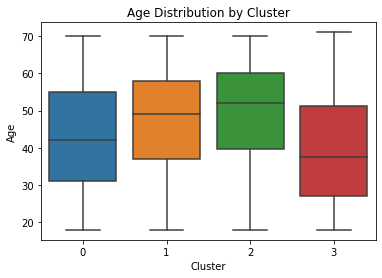

In [58]:
# Example: Show the distribution of a feature within each cluster
import seaborn as sns

sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.show()


In [60]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.2637585525533707


In [61]:
from sklearn.cluster import KMeans
import pandas as pd


# Fit KMeans clustering with 2 components
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df['Cluster'].unique())


[1 0]


In [62]:
import statsmodels.api as sm

# Define a function to fit regression models for each cluster
def fit_regression(data, y_col, X_cols):
    X = data[X_cols]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = data[y_col]
    model = sm.OLS(y, X).fit()
    return model

# Define columns
y_col = 'Like_rating'
X_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Fit models for each cluster
models = {}
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    models[cluster] = fit_regression(cluster_data, y_col, X_cols)

# Print summaries of the models
for cluster, model in models.items():
    print(f"Summary for Cluster {cluster}:")
    print(model.summary())


Summary for Cluster 0:
                            OLS Regression Results                            
Dep. Variable:            Like_rating   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     32.85
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           8.53e-60
Time:                        21:06:32   Log-Likelihood:                -1737.2
No. Observations:                1005   AIC:                             3498.
Df Residuals:                     993   BIC:                             3557.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3548      0.

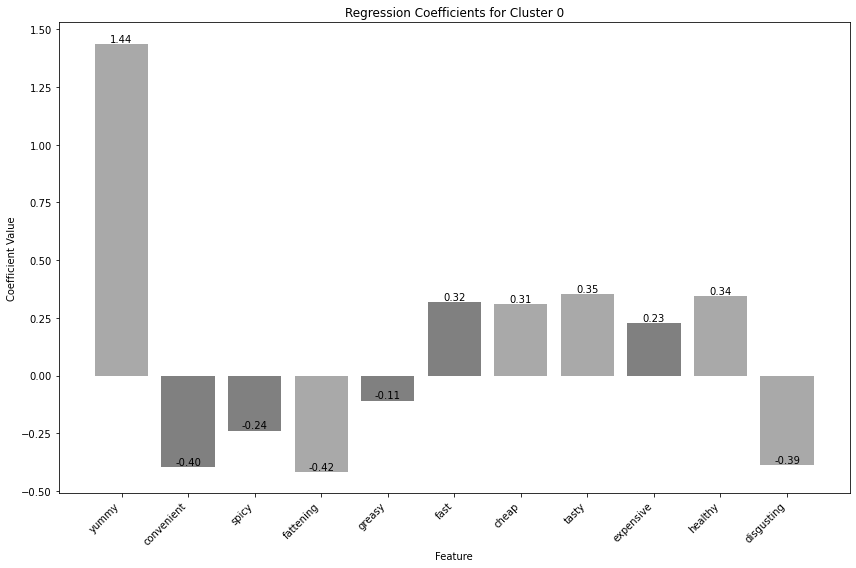

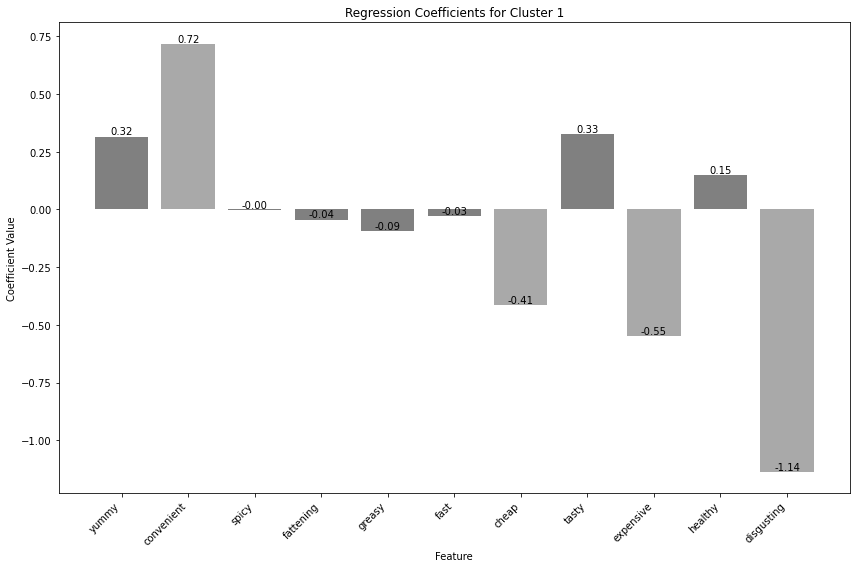

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_coefficients(models, X_cols):
    for cluster, model in models.items():
        # Extract coefficients and p-values
        coeffs = model.params[1:]  # Exclude the constant term
        pvals = model.pvalues[1:]  # Exclude the constant term
        is_significant = pvals < 0.05
        
        # Check lengths for consistency
        assert len(X_cols) == len(coeffs) == len(is_significant), "Lengths of X_cols, coeffs, and is_significant must match."
        
        # Plot
        plt.figure(figsize=(12, 8))
        bars = plt.bar(X_cols, coeffs, color=np.where(is_significant, 'darkgrey', 'grey'))
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Regression Coefficients for Cluster {cluster}')
        plt.xlabel('Feature')
        plt.ylabel('Coefficient Value')
        
        # Add confidence intervals
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

plot_coefficients(models, X_cols)


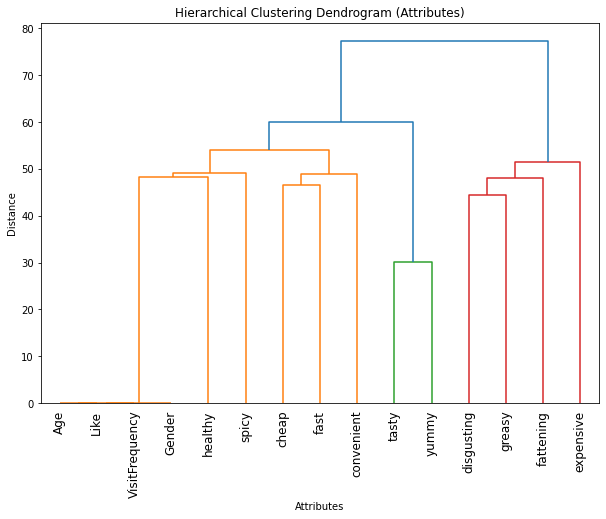

In [65]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming MD_x is your data DataFrame and MD_k4 is your segmentation result
# Standardize the data if necessary
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Hierarchical clustering on attributes (transposed data)
linkage_matrix = linkage(MD_x_scaled.T, method='ward', metric='euclidean')

# Create a dendrogram to visualize clustering
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=MD_x.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Attributes)')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Get the order of attributes from the hierarchical clustering
order = [MD_x.columns[i] for i in np.argsort(linkage_matrix[:, 0])]


In [70]:
MD_x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0


In [71]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 4

# Prepare the data for clustering by excluding non-numeric columns
MD_x_clustering = MD_x.drop(['Like', 'Age', 'VisitFrequency', 'Gender'], axis=1)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
MD_x['Cluster'] = kmeans.fit_predict(MD_x_clustering)  # Add cluster assignments to the DataFrame


In [72]:
from scipy.cluster.hierarchy import linkage, leaves_list
from sklearn.preprocessing import StandardScaler

# Standardize the data for hierarchical clustering
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_clustering)

# Perform hierarchical clustering on the attributes
linkage_matrix = linkage(MD_x_scaled.T, method='ward', metric='euclidean')

# Get the order of attributes from the hierarchical clustering
order = MD_x_clustering.columns[leaves_list(linkage_matrix)]


In [74]:
print("Attributes in segment_profile:", segment_profile.columns)
print("Attributes in order:", order)


Attributes in segment_profile: Int64Index([0, 1, 2, 3], dtype='int64', name='Cluster')
Attributes in order: Index(['expensive', 'fattening', 'greasy', 'disgusting', 'yummy', 'tasty',
       'convenient', 'fast', 'cheap', 'spicy', 'healthy'],
      dtype='object')


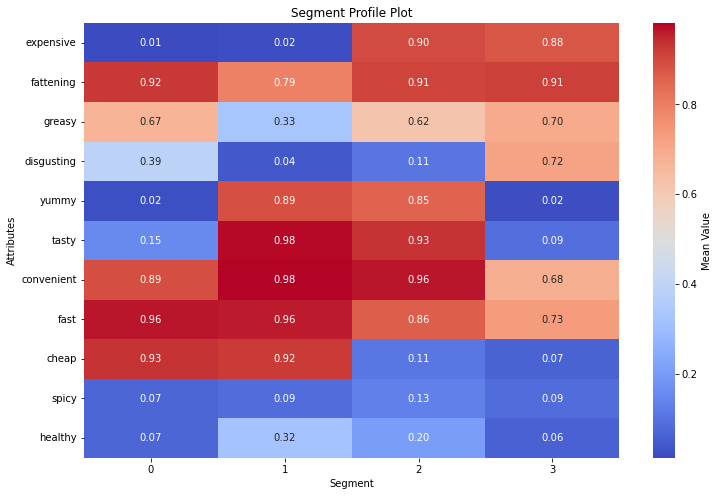

In [75]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, leaves_list
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Exclude non-numeric columns for clustering
MD_x_clustering = MD_x.drop(['Like', 'Age', 'VisitFrequency', 'Gender'], axis=1)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_clustering)

# Perform hierarchical clustering on the attributes
linkage_matrix = linkage(MD_x_scaled.T, method='ward', metric='euclidean')

# Get the order of attributes from hierarchical clustering
order = MD_x_clustering.columns[leaves_list(linkage_matrix)]

# Add cluster assignments to the DataFrame
kmeans = KMeans(n_clusters=4, random_state=42)
MD_x['Cluster'] = kmeans.fit_predict(MD_x_clustering)

# Calculate mean values for each segment
segment_profile = MD_x.groupby('Cluster').mean().T  # Transpose to match the profile plot format

# Ensure the columns in segment_profile match the order from hierarchical clustering
# Reorder attributes based on hierarchical clustering
order = [attr for attr in order if attr in segment_profile.index]

# Reorder the index of segment_profile DataFrame
segment_profile = segment_profile.loc[order]

# Plotting the segment profile
plt.figure(figsize=(12, 8))
sns.heatmap(segment_profile, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Mean Value'})
plt.title('Segment Profile Plot')
plt.xlabel('Segment')
plt.ylabel('Attributes')
plt.show()


<Figure size 864x576 with 0 Axes>

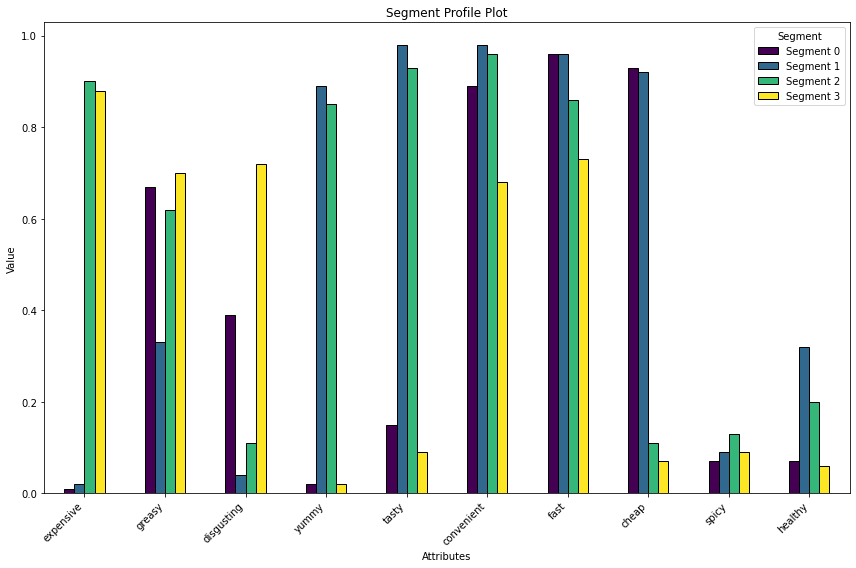

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for segment profiles
data = {
    'Attribute': ['expensive', 'greasy', 'disgusting', 'yummy', 'tasty', 
                  'convenient', 'fast', 'cheap', 'spicy', 'healthy'],
    'Segment 0': [0.01, 0.67, 0.39, 0.02, 0.15, 0.89, 0.96, 0.93, 0.07, 0.07],
    'Segment 1': [0.02, 0.33, 0.04, 0.89, 0.98, 0.98, 0.96, 0.92, 0.09, 0.32],
    'Segment 2': [0.90, 0.62, 0.11, 0.85, 0.93, 0.96, 0.86, 0.11, 0.13, 0.20],
    'Segment 3': [0.88, 0.70, 0.72, 0.02, 0.09, 0.68, 0.73, 0.07, 0.09, 0.06]
}

# Create DataFrame
dfrr = pd.DataFrame(data)

# Set 'Attribute' as index
dfrr.set_index('Attribute', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
ax = dfrr.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title('Segment Profile Plot')
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()

# Show plot
plt.show()


In [79]:
from sklearn.cluster import KMeans

# Assuming X is your transformed data matrix
kmeans = KMeans(n_clusters=4, random_state=123)
MD_k4 = kmeans.fit_predict(X)


In [80]:
X['Cluster'] = MD_k4
print(X.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like_rating  VisitFrequency_num  Gender_num  Cluster  
0        0           0           -3                   4           0        2  
1        0           0            2                   4           0        1  
2        1           0            1                   4           0        0  
3        0           1            4                   2           0        3  
4        1           0            2                   3           1        1  


C:\Users\Tharun\AppData\Local\Temp\ipykernel_13324\837332852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = MD_k4


In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 components for plotting
MD_pca = pca.fit_transform(X)


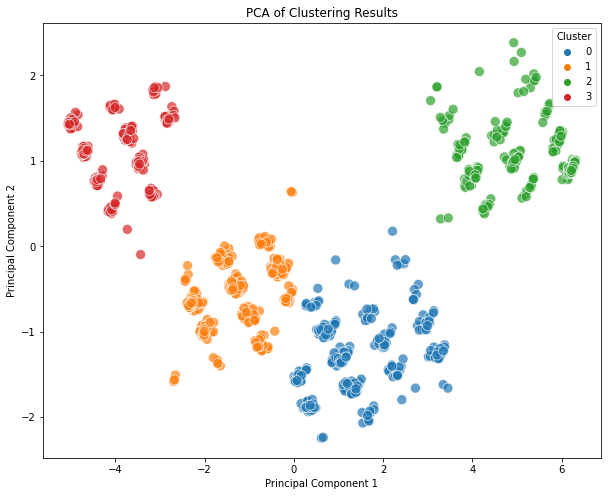

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert PCA results and cluster labels into a DataFrame
pca_df = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = MD_k4

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=100, alpha=0.7)
plt.title('PCA of Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


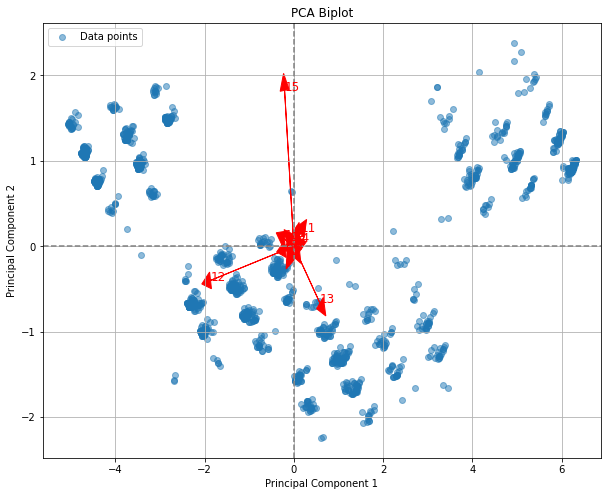

In [88]:
import numpy as np

# Project PCA axes
def plot_pca_biplot(pca, data, scale=1.0):
    # Principal components
    components = pca.components_.T
    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data points')
    
    for i in range(components.shape[0]):
        plt.arrow(0, 0, components[i, 0] * scale, components[i, 1] * scale,color='red', head_width=0.1 * scale, head_length=0.1 * scale)
        plt.text(components[i, 0] * scale, components[i, 1] * scale,f'{i+1}', color='red', fontsize=12)
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pca_biplot(pca, MD_pca, scale = 2.0)


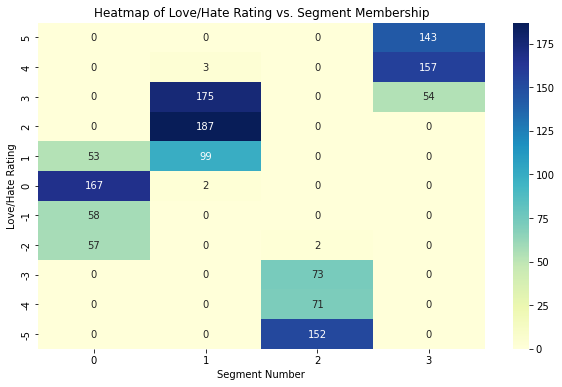

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming MD_k4 contains the cluster labels and X['Like_rating'] contains the love/hate ratings
segments = MD_k4
love_hate = X['Like_rating']  # Use 'Like_rating' if it represents the sentiment

# Create a DataFrame for ease of cross-tabulation
df = pd.DataFrame({'Segment': segments, 'Love_Hate': love_hate})

# Cross-tabulate and transpose
crosstab = pd.crosstab(df['Love_Hate'], df['Segment']) 


rating_order = sorted(df['Love_Hate'].unique(), reverse=True)
crosstab = crosstab.reindex(rating_order)

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", cbar=True, fmt='g', 
            xticklabels=crosstab.columns, yticklabels=crosstab.index)
plt.ylabel('Love/Hate Rating') 
plt.xlabel('Segment Number')  
plt.title('Heatmap of Love/Hate Rating vs. Segment Membership')
plt.show()
